# Importing Libraries

In [4]:
import tensorflow as tf          # pip install tensorflow-gpu
import cv2                       # pip install opencv-python
import os
import matplotlib.pyplot as plt  # pip install matplotlib
import numpy as np               # pip install numpy

# Image Loading and Visualization

In [5]:
# reading an image
img_array = cv2.imread("Training/0/Training_3908.jpg")

In [6]:
# displaying the shape of the image
img_array.shape # RGB

(48, 48, 3)

In [7]:
# printing the image array
print (img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


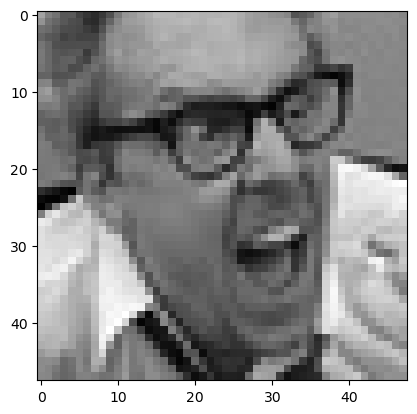

In [8]:
# displaying the image using Matplotlib (Note: OpenCV reads images in BGR format)
plt.imshow(img_array) # BGR

# Data Directory and Classes

In [9]:
# defining the data directory
Datadirectory = "Training" # training dataset

In [10]:
# defining the classes
Classes = ["0", "1", "2", "3", "4", "5", "6"] # list of classes

# Counting Images per Folder

In [11]:
# function to count images per folder
def count_images_per_folder(Datadirectory):
    image_counts = []
    folders = sorted(os.listdir(Datadirectory))
    
    for folder in folders:
        folder_path = os.path.join(Datadirectory, folder)
        if os.path.isdir(folder_path):
            images_in_folder = len(os.listdir(folder_path))
            image_counts.append(images_in_folder)
    
    return image_counts

# Visualization

## Plotting Images per Folder Distribution

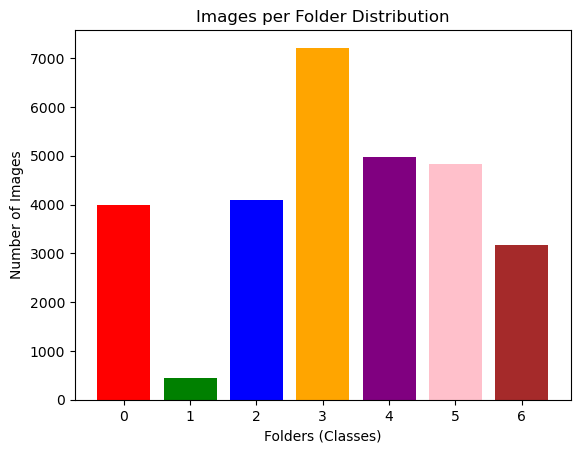

In [12]:
# get image counts
image_counts = count_images_per_folder(Datadirectory)

# define colors for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown']

# plotting the graph with different colors for each bar
folders = [str(i) for i in range(len(image_counts))]
plt.bar(folders, image_counts, color=colors)
plt.xlabel('Folders (Classes)')
plt.ylabel('Number of Images')
plt.title('Images per Folder Distribution')
plt.show()

# Displaying Sample Images

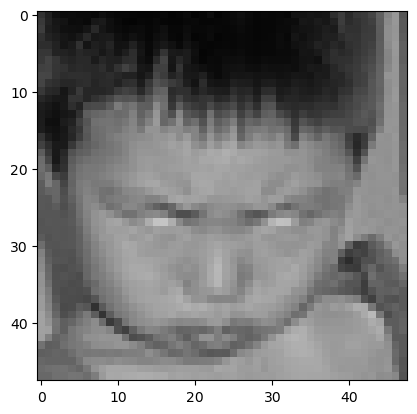

In [13]:
# displaying one image from each class
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) # read all path images
        # backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

# Image Resizing and Dataset Creation

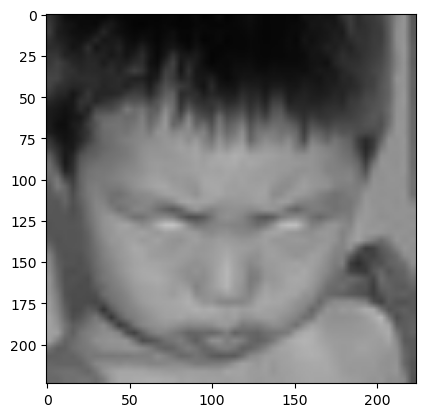

In [14]:
# change the size of the image
img_size = 224 ## ImageNet: 224 x 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
# checking the size of the new array
new_array.shape

(224, 224, 3)

## Read all the images and convert them to array



In [16]:
# initializing data array for training
training_Data = [] # data array

# function to create training data
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                    pass               

In [17]:
# create training data
create_training_Data() # read all images

In [18]:
# print the number of images read
print(len(training_Data))

28709


# Data Shuffling and Normalization

In [19]:
# importing the random library and shuffling the training data
import random

random.shuffle(training_Data) # shuffing, to avoid the model learn the sequence

In [20]:
# preparing data and labels
X = [] # data/feature
y = [] # label

for features, label in training_Data:
    X.append(features)
    y.append(label)
    
# converting data to 4 dimensions
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [21]:
# displaying the shape of the data
X.shape

(28709, 224, 224, 3)

In [22]:
## normalize the data
X = X/255.0; ## normalizing 

In [23]:
# checking the type of labels
type(y)

list

In [24]:
# displaying the first label
[0]

[0]

In [25]:
# converting labels to numpy array
Y = np.array(y)

In [26]:
# displaying the shape of the labels
Y.shape

(28709,)

# Model Architecture and Loading

## Importing TensorFlow and loading a pre-trained MobileNetV2 model

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
model = tf.keras.applications.MobileNetV2() # pre-trained model

In [29]:
# displaying the model summary
model.summary() # model summary

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

# Modifying and Compiling the Model

## Transfer Learning - Tuning, weights will start from last check point

**Extracting input and output layers of the model**

In [30]:
base_input = model.layers[0].input ## input

In [31]:
base_output = model.layers[-2].output

In [32]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [33]:
# adding new layers to the model for custom classification
final_output = layers.Dense(128)(base_output) # adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) # activation function
final_output = layers.Dense(64)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation = 'softmax')(final_output) # classes are 07, classification layer

In [34]:
final_output # output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [35]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [36]:
# displaying the summary of the new model
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

## Hyperparameters and Optimization

In [37]:
# compiling the model with specified loss function, optimizer, and metrics
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [38]:
# loading a pre-trained model
new_model = tf.keras.models.load_model('Final_model_95p07.h5')

# Real-time Face Emotion Recognition using Webcam

In [39]:
# reading an image from file
frame = cv2.imread("cryingboy.jpg") # read image

In [40]:
# displaying the shape of the image
frame.shape 

(999, 1500, 3)

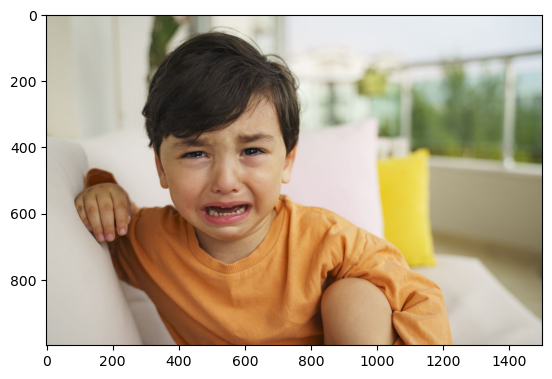

In [41]:
# displaying the image using Matplotlib
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Face detection algorithm (gray image)

In [42]:
# detecting faces using Haar Cascade Classifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [43]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [44]:
gray.shape # convert into gray image

(999, 1500)

In [45]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

# looping over detected faces and drawing rectangles
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (225, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

# Cropping and Predicting Emotion

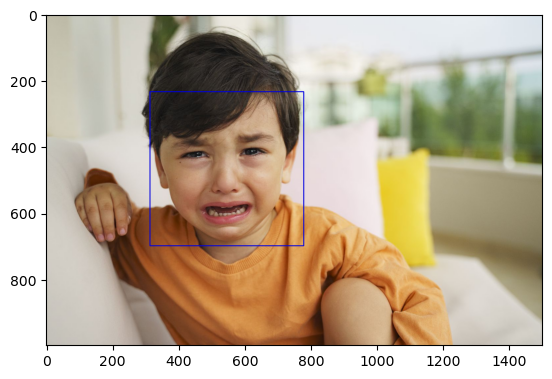

In [46]:
# displaying the image with detected face
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

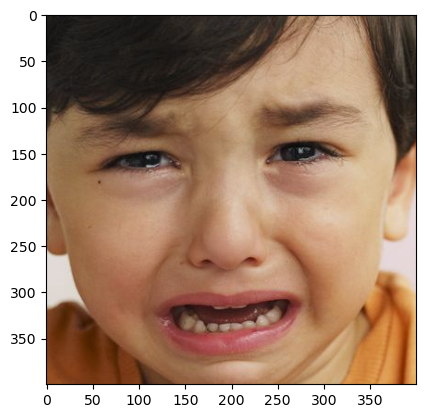

In [47]:
# cropping the detected face
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [48]:
# resizing and normalizing the cropped face
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
final_image = final_image/255.0 ## normalizing

In [49]:
# making predictions using the pre-trained model
Predictions = new_model.predict(final_image)

1/1 [==============================] - 1s 1s/step


In [50]:
# displaying the raw predictions
Predictions[0]

array([0.23574127, 0.05604619, 0.18952134, 0.17027864, 0.15384378,
       0.0729184 , 0.12165039], dtype=float32)

In [51]:
# extracting the predicted class (index of the maximum probability)
np.argmax(Predictions)

0

# Displaying Predicted Emotion on Webcam Feed

## Realtime Video Demonstration

In [ ]:
# importing necessary libraries for drawing text on an image
import cv2
import numpy as np

# setting up parameters for drawing text
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# setting the rectangle background to white
rectangle_bgr = (255, 255, 255)

# creating a black image
img = np.zeros((500, 500))

# setting some text
text = "Some text in a box!"

# getting the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

# setting the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# making the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

# capturing video from a webcam
cap = cv2.VideoCapture(1)

# checking if the webcam is opened successfully, if not, trying another source
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# initialize face_roi before the loop
face_roi = None

# main loop for real-time face emotion recognition
while True:
    ret, frame = cap.read()
    
    # using Haar Cascade Classifier for face detection
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey + eh, ex:ex + ew] # cropping the face

    if face_roi is not None:  # Check if face_roi is defined
        final_image = cv2.resize(face_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
        final_image = final_image / 255.0

    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # using the pre-trained model to make predictions
    Predictions = new_model.predict(final_image)
    
    # setting up the display based on the predicted emotion
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    # displaying the status and bounding box on the video frame
    if (np.argmax(Predictions) == 0):
        status = "Angry"

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 225), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))

    elif (np.argmax(Predictions) == 1):
        status = "Disgust"

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 225), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))
        
    elif (np.argmax(Predictions) == 2):
        status = "Fear"

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 225), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))

    elif (np.argmax(Predictions) == 3):
        status = "Happy"

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 225), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))
        
    elif (np.argmax(Predictions) == 4):
        status = "Neutral"

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 225), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))
        
    elif (np.argmax(Predictions) == 5):
        status = "Sad"

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 225), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))
        
    elif (np.argmax(Predictions) == 6):
        status = "Surprise"

        x1, y1, w1, h1 = 0, 0, 175, 75
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 225), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255))
    
    # displaying the video frame with bounding box and emotion status
    cv2.imshow('Face Emotion Recognition', frame)

    # break the loop if 'q' is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 49ms/step
Face not detected
1/1 [==============================] - 0s 46ms/step
Face not detected
1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 35ms/step
Face not detected
1/1 [==============================] - 0s 37ms/step
Face not detected
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 41ms/step
Face not detected
1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 40ms/step
Face not detected
1/1 [==============================] - 0s 42ms/step
Face not detected
1/1 [==============================] - 0s 39ms/step
Face not detected
1/1 [==============================] - 0s 49ms/step
Face not detected
1/